<a href="https://colab.research.google.com/github/e-saidha/Iris-flower-ML/blob/main/Iris_Flower_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets


In [2]:
iris = datasets.load_iris()

In [3]:
df = pd.DataFrame(data = iris.data, columns = iris.feature_names)

In [4]:
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

In [5]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   sepal length (cm)  150 non-null    float64 
 1   sepal width (cm)   150 non-null    float64 
 2   petal length (cm)  150 non-null    float64 
 3   petal width (cm)   150 non-null    float64 
 4   species            150 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.1 KB


In [7]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.columns = df.columns.str[:-5]


In [8]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,sp
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [9]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
df = df.drop_duplicates()

In [11]:
df.shape


(149, 5)

In [12]:
df['sp'].value_counts()

,count
sp,
setosa,50
versicolor,50
virginica,49


<Axes: xlabel='petal_width', ylabel='Count'>

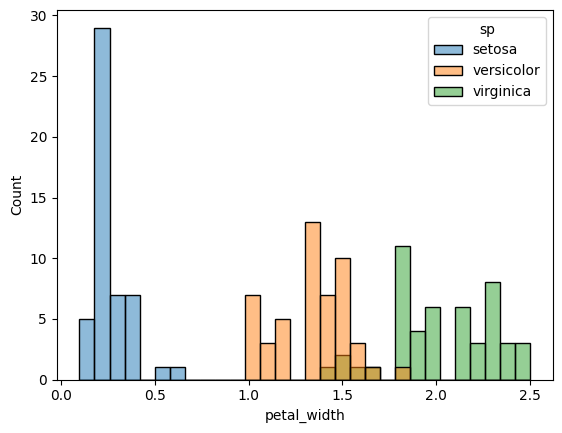

In [13]:
sns.histplot(bins =30,alpha = 0.5, data = df, hue = 'sp', x ='petal_width')

<Axes: xlabel='petal_length', ylabel='Density'>

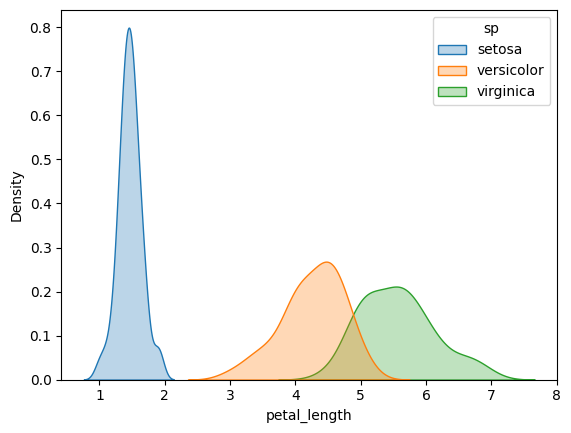

In [14]:
sns.kdeplot(data=df, x='petal_length', hue='sp', fill=True, alpha=0.3)

<Axes: xlabel='sp', ylabel='petal_length'>

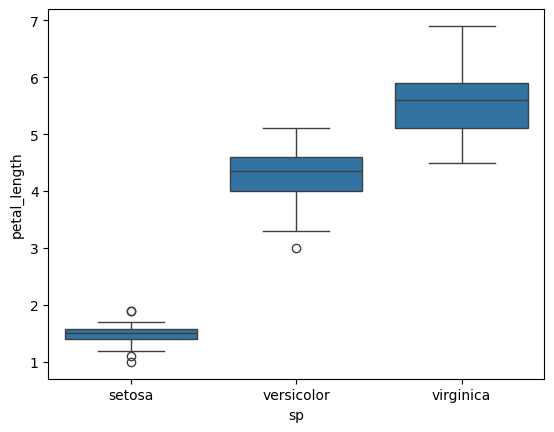

In [15]:
sns.boxplot(x = 'sp', y = 'petal_length', data =df)

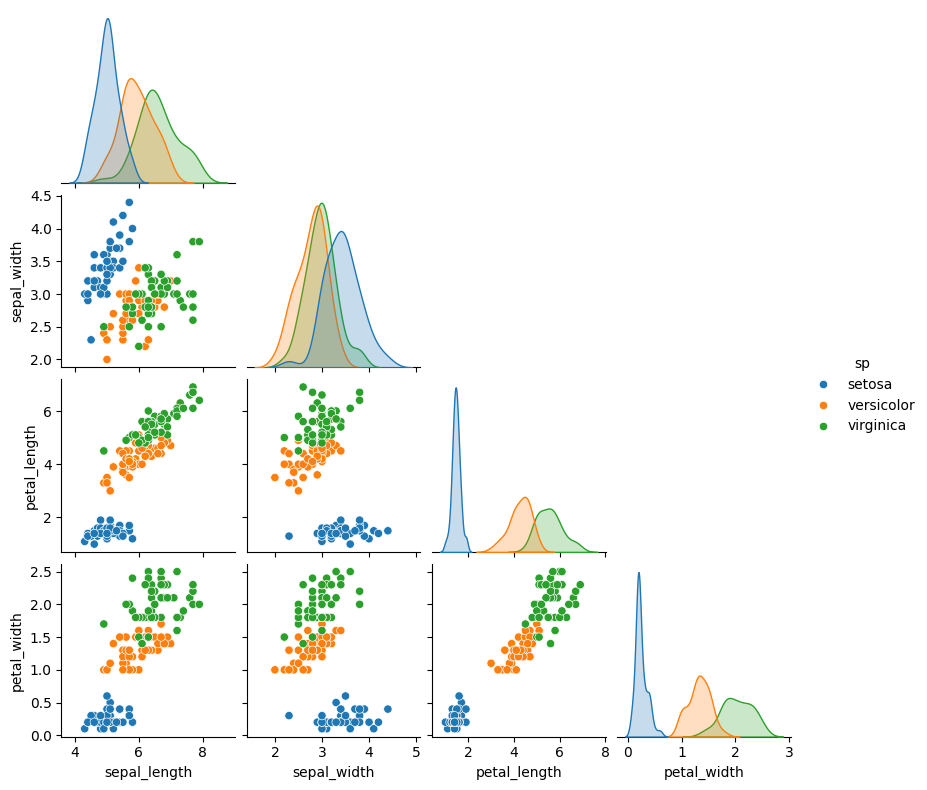

In [16]:
sns.pairplot(df,hue ='sp', height = 2, corner = True)

Logistic Regression

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

X = df.drop('sp',axis=1)
y =df['sp']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.4, random_state =42, stratify = y)

print("Train size:", X_train.shape)
print("Test size:", X_test.shape)


Train size: (89, 4)
Test size: (60, 4)


In [18]:
model = LogisticRegression(max_iter =200)

In [19]:
model.fit(X_train,y_train)

LogisticRegression(max_iter=200)

In [20]:
y_pred = model.predict(X_test)

In [21]:
acc_lr = accuracy_score(y_pred,y_test)

In [22]:
print(confusion_matrix(y_pred,y_test))

[[20  0  0]
 [ 0 20  2]
 [ 0  0 18]]


In [23]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        20
  versicolor       0.91      1.00      0.95        20
   virginica       1.00      0.90      0.95        20

    accuracy                           0.97        60
   macro avg       0.97      0.97      0.97        60
weighted avg       0.97      0.97      0.97        60



Random Forest


In [24]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=300, random_state=4, max_depth = 20, n_jobs=-1)
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)
rf_acc = accuracy_score(y_test,y_pred_rf)


In [25]:
print(rf_acc)

0.9166666666666666


In [26]:
print("\n--- Logistic Regression ---")
print(classification_report(y_test, y_pred))

print("\n--- Random Forest ---")
print(classification_report(y_test, y_pred_rf))



--- Logistic Regression ---
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        20
  versicolor       0.91      1.00      0.95        20
   virginica       1.00      0.90      0.95        20

    accuracy                           0.97        60
   macro avg       0.97      0.97      0.97        60
weighted avg       0.97      0.97      0.97        60


--- Random Forest ---
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        20
  versicolor       0.83      0.95      0.88        20
   virginica       0.94      0.80      0.86        20

    accuracy                           0.92        60
   macro avg       0.92      0.92      0.92        60
weighted avg       0.92      0.92      0.92        60



Text(0.5, 1.0, 'Logistic Regression vs Random Forest')

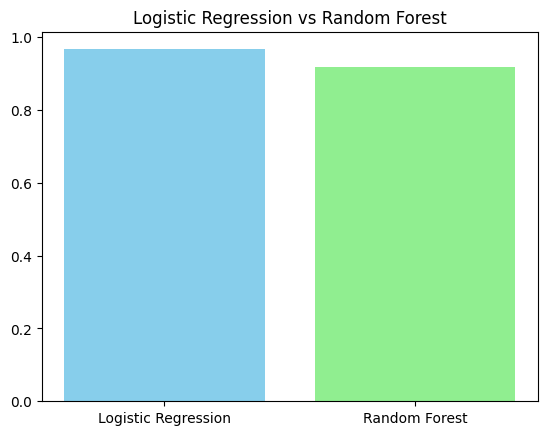

In [27]:
models = ['Logistic Regression', 'Random Forest']
accuracies = [acc_lr, rf_acc]

plt.bar(models, accuracies, color=['skyblue', 'lightgreen'])
plt.title('Logistic Regression vs Random Forest')

Features for Logistic Regression

In [28]:
coeffs = pd.DataFrame(model.coef_, columns = X.columns, index = model.classes_)

In [29]:
coeffs.head()

,sepal_length,sepal_width,petal_length,petal_width
setosa,-0.489842,0.789926,-2.076769,-0.905476
versicolor,0.477732,-0.516816,-0.085692,-0.808094
virginica,0.012110,-0.273110,2.162461,1.713570


In [30]:
lr_imp = coeffs.abs().mean().sort_values(ascending = False)

In [31]:
print(lr_imp)

petal_length    1.441641
petal_width     1.142380
sepal_width     0.526617
sepal_length    0.326561
dtype: float64


Text(0.5, 1.0, 'Feature Importance (Logistic Regression)')

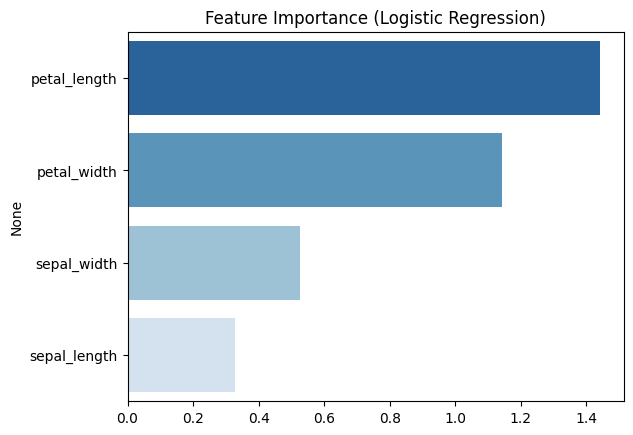

In [32]:
sns.barplot(x=lr_imp.values,y=lr_imp.index,hue=lr_imp.index,legend=False,palette = 'Blues_r')
plt.title("Feature Importance (Logistic Regression)")


Features for Random Forest

In [33]:
rf_imp = pd.Series(rf.feature_importances_, index = X.columns).sort_values(ascending =False)

In [35]:
print(rf_imp)

petal_width     0.473815
petal_length    0.394926
sepal_length    0.091985
sepal_width     0.039274
dtype: float64


<Axes: ylabel='None'>

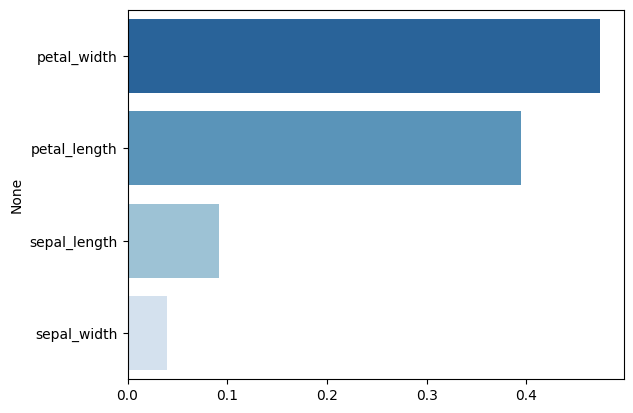

In [34]:

sns.barplot(x=rf_imp.values, y = rf_imp.index, hue = rf_imp.index, palette = 'Blues_r')